In [8]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df = pd.DataFrame(data)
print("Sample data:")
print(df.head())

Sample data:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [4]:
import pandas as pd
df_data = pd.read_csv("/content/sample_data/data.csv")
df_ssd = pd.read_csv("/content/sample_data/sample_sales_data.csv")
print(df_data.head())
print()
print(df_ssd.head())

   ID     Name  Age         City
0   1    Alice   25     New York
1   2      Bob   30  Los Angeles
2   3  Charlie   35      Chicago
3   4    David   40      Houston
4   5      Eva   28      Phoenix

    Product  Quantity  Price  Sales Region
0    Laptop         5   1000   5000  North
1     Mouse        15     20    300   West
2  Keyboard        10     50    500   East
3   Monitor         8    200   1600  South
4    Laptop        12    950  11400  North


In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print("Sample data:")
print(df.head())

Sample data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [12]:
df_mobile = pd.read_csv("/content/sample_data/Mobiles_Dataset_2025.csv", encoding='latin-1')
print("Sample data:")
print(df_mobile.head())

Sample data:
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999             INR 84,999 

In [14]:
sales_by_region = df_ssd.groupby('Region')['Sales'].sum()
print("\nTotal sales by region:")
print(sales_by_region)


Total sales by region:
Region
East       770
North    16400
South     3070
West       650
Name: Sales, dtype: int64


In [18]:
best_selling_products = df_ssd.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("\nBest-selling products byquantity:")
print(best_selling_products)


Best-selling products byquantity:
Product
Mouse       29
Laptop      17
Keyboard    16
Monitor     15
Name: Quantity, dtype: int64


In [19]:
sales_by_region.to_csv('sales_by_region.csv')
best_selling_products.to_csv('best_selling_products.csv')
print("\nAnalysis results saved to CSV files.")


Analysis results saved to CSV files.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed
<ipython-input-20-6ecb04ad3b40>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance_data['Daily Return'] = reliance_data['Close'].pct_change()


First 5 rows of the dataset:
Ticker      RELIANCE.NS                                                   \
Price              Open         High          Low        Close    Volume   
Date                                                                       
2022-10-03  1088.493134  1100.076669  1075.521371  1078.479858  11852723   
2022-10-04  1091.360592  1100.554607  1087.878645  1098.369873   8948850   
2022-10-06  1105.561415  1115.119493  1100.622978  1102.420776  13352162   
2022-10-07  1099.029980  1112.343173  1099.029980  1107.086182   7714340   
2022-10-10  1094.637648  1100.372591  1086.900123  1095.001831   6329527   

Ticker           TCS.NS                                                  \
Price              Open         High          Low        Close   Volume   
Date                                                                      
2022-10-03  2799.044109  2823.062572  2779.418090  2789.651611  1763331   
2022-10-04  2831.707297  2895.304988  2825.212065  2888.903076

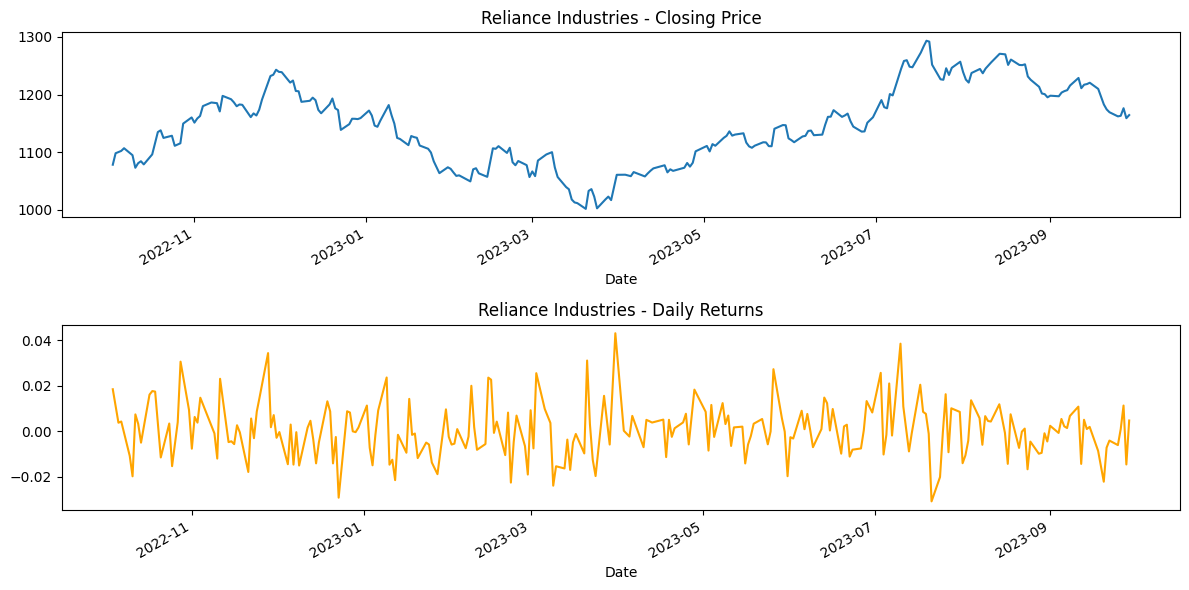


Reliance stock data saved to 'reliance_stock_data.csv'.


In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Downloading Stock Market Data
# Define the ticker symbols for Indian companies
# Example: Reliance Industries (RELIANCE.NS), TCS (TCS.NS), Infosys (INFY.NS)
tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]

# Fetch historical data for the last 1 year
data = yf.download(tickers, start="2022-10-01", end="2023-10-01",group_by='ticker')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Step 3: Basic Data Exploration
# Check the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

# Check column names
print("\nColumn names:")
print(data.columns)

# Summary statistics for a specific stock (e.g., Reliance)
reliance_data = data['RELIANCE.NS']
print("\nSummary statistics for Reliance Industries:")
print(reliance_data.describe())

# Calculate daily returns
reliance_data['Daily Return'] = reliance_data['Close'].pct_change()

# Plot the closing price and daily returns
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
reliance_data['Close'].plot(title="Reliance Industries - Closing Price")
plt.subplot(2, 1, 2)
reliance_data['Daily Return'].plot(title="Reliance Industries - Daily Returns", color='orange')
plt.tight_layout()
plt.show()

# Step 4: Saving the Processed Data to a New CSV File
# Save the Reliance data to a CSV file
reliance_data.to_csv('reliance_stock_data.csv')
print("\nReliance stock data saved to 'reliance_stock_data.csv'.")